In [1]:
import pandas as pd
import numpy as np

In [2]:
DATA_PATH = "/home/vdesai/bats_data/training_files/data.csv"

In [3]:
df = pd.read_csv(DATA_PATH)

In [4]:
df.dropna(inplace = True)

In [7]:
df

,Filename,ParentDir,NextDirUp,TimeInFile,PrecedingIntrvl,CallsPerSec,CallDuration,Fc,HiFreq,LowFreq,...,meanKn-FcCurviness,Kn-FcCurvinessTrndSlp,Path,Version,Filter,Preemphasis,MinAccpQuality,MaxSegLnght,Max#CallsConsidered,TimeIndex
19,barn1_D20220205T192049m784-HiF.wav,20220205.0,20220205_to_20220208,0.0,88.848,8.285279,3.382704,48.322922,64.705158,44.053422,...,-0.000443,-0.002138,Z:\barn1\grouped_audio\20220205_to_20220208\20...,4.4.5,5 kHz,medium,0.8,0.5 sec,32.0,19
20,barn1_D20220205T192049m784-HiF.wav,20220205.0,20220205_to_20220208,89.0,85.536,8.285279,4.559732,47.321490,87.287901,47.058188,...,0.001168,-0.000628,Z:\barn1\grouped_audio\20220205_to_20220208\20...,4.4.5,5 kHz,medium,0.8,0.5 sec,32.0,20
21,barn1_D20220205T192049m784-HiF.wav,20220205.0,20220205_to_20220208,171.0,86.832,8.285279,4.144724,56.160687,88.007288,46.471624,...,0.001672,-0.001099,Z:\barn1\grouped_audio\20220205_to_20220208\20...,4.4.5,5 kHz,medium,0.8,0.5 sec,32.0,21
22,barn1_D20220205T192049m784-HiF.wav,20220205.0,20220205_to_20220208,322.0,151.056,8.285279,3.244776,54.823910,73.853257,54.494605,...,0.002455,0.001241,Z:\barn1\grouped_audio\20220205_to_20220208\20...,4.4.5,5 kHz,medium,0.8,0.5 sec,32.0,22
23,barn1_D20220205T192049m784-HiF.wav,20220205.0,20220205_to_20220208,407.0,85.248,8.285279,4.283400,54.327804,85.809596,47.151493,...,0.001372,-0.001822,Z:\barn1\grouped_audio\20220205_to_20220208\20...,4.4.5,5 kHz,medium,0.8,0.5 sec,32.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298779,barn1_D20220723T220206m609.wav,20220723.0,20220720_to_20220723,3233.0,21.744,8.283792,4.350495,15.638454,16.109236,14.852740,...,0.000618,-0.017106,Z:\barn1\grouped_audio\20220720_to_20220723\20...,4.4.5,5 kHz,medium,0.8,0.5 sec,32.0,27
298780,barn1_D20220723T220206m609.wav,20220723.0,20220720_to_20220723,3286.0,67.968,8.283792,6.718440,30.814246,50.413166,29.467130,...,0.000547,-0.000401,Z:\barn1\grouped_audio\20220720_to_20220723\20...,4.4.5,5 kHz,medium,0.8,0.5 sec,32.0,28
298781,barn1_D20220723T220206m609.wav,20220723.0,20220720_to_20220723,3374.0,19.008,8.283792,2.961511,29.290696,32.564958,26.443384,...,0.000188,0.001520,Z:\barn1\grouped_audio\20220720_to_20220723\20...,4.4.5,5 kHz,medium,0.8,0.5 sec,32.0,29
298782,barn1_D20220723T220206m609.wav,20220723.0,20220720_to_20220723,3415.0,18.720,8.283792,1.810534,18.331386,18.635079,18.173593,...,-0.000000,0.000000,Z:\barn1\grouped_audio\20220720_to_20220723\20...,4.4.5,5 kHz,medium,0.8,0.5 sec,32.0,30


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Sample code, need actual data for execution
def perform_pca(data):
    # Load the dataset

    # Identify and remove non-numeric columns
    numeric_columns = data.select_dtypes(include=['number']).columns
    data_numeric = data[numeric_columns]

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_numeric)

    # Apply PCA
    pca = PCA()
    pca.fit(scaled_data)

    # Plot the explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
    plt.title('Explained Variance by Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()

    # Heatmap of Component Loadings
    plt.figure(figsize=(12, 6))
    sns.heatmap(pd.DataFrame(pca.components_, columns=data_numeric.columns), cmap='viridis')
    plt.title('PCA Component Loadings')
    plt.ylabel('Principal Component')
    plt.xlabel('Feature')
    plt.show()

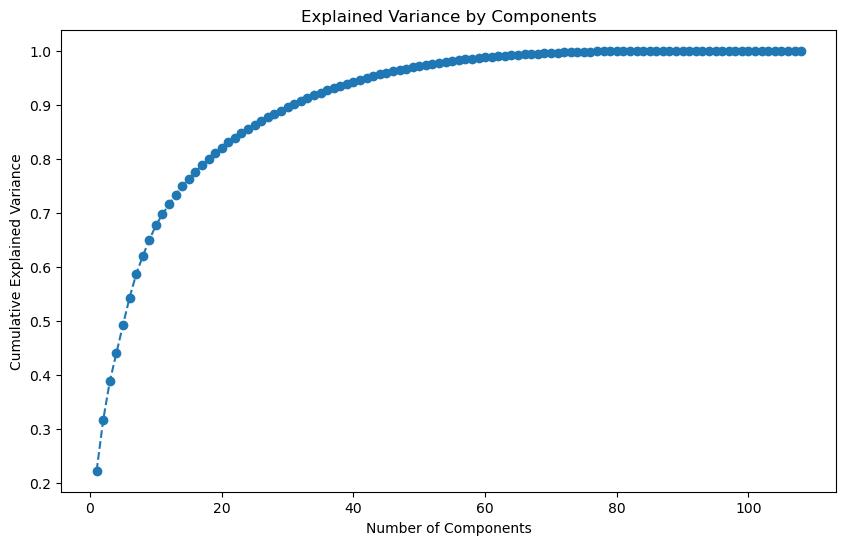

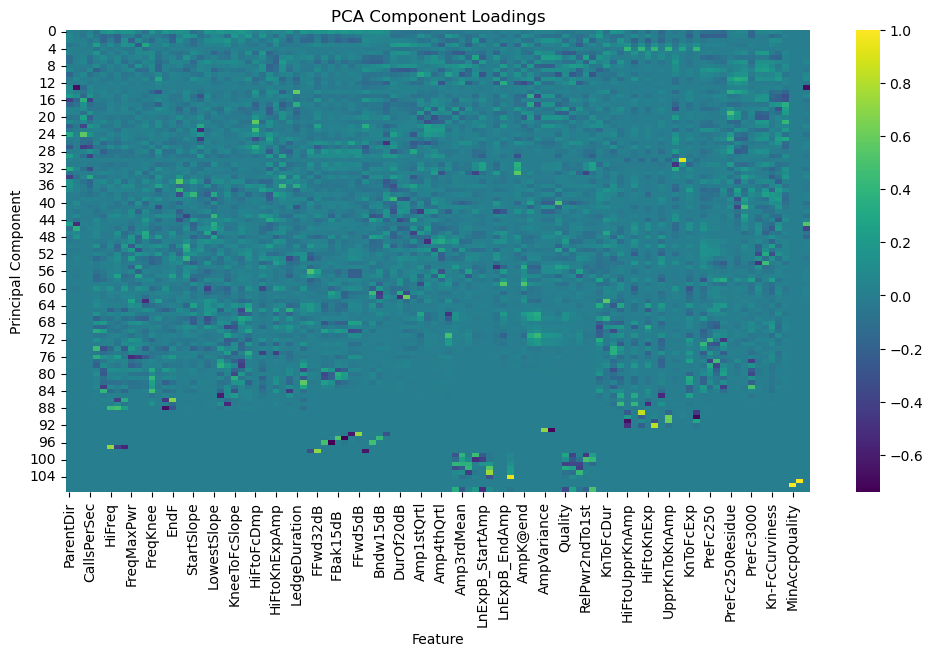

In [11]:
perform_pca(df)

In [7]:
" ".join(list(df.columns))

'Filename ParentDir NextDirUp TimeInFile PrecedingIntrvl CallsPerSec CallDuration Fc HiFreq LowFreq Bndwdth FreqMaxPwr PrcntMaxAmpDur TimeFromMaxToFc FreqKnee PrcntKneeDur StartF EndF DominantSlope SlopeAtFc StartSlope EndSlope SteepestSlope LowestSlope TotalSlope HiFtoKnSlope KneeToFcSlope CummNmlzdSlp HiFtoFcExpAmp HiFtoFcDmp KnToFcExpAmp KnToFcDmp HiFtoKnExpAmp HiFtoKnDmp FreqLedge LedgeDuration FreqCtr FBak32dB FFwd32dB FBak20dB FFwd20dB FBak15dB   FFwd15dB FBak5dB FFwd5dB Bndw32dB Bndw20dB Bndw15dB Bndw5dB DurOf32dB DurOf20dB DurOf15dB DurOf5dB Amp1stQrtl Amp2ndQrtl Amp3rdQrtl Amp4thQrtl Amp1stMean Amp2ndMean Amp3rdMean Amp4thMean LnExpA_StartAmp LnExpB_StartAmp AmpStartLn60ExpC LnExpA_EndAmp LnExpB_EndAmp AmpEndLn60ExpC AmpK@start AmpK@end AmpKurtosis AmpSkew AmpVariance AmpMoment AmpGausR2 Quality HiFminusStartF FcMinusEndF RelPwr2ndTo1st RelPwr3rdTo1st LdgToFcSlp KnToFcDur UpprKnFreq HiFtoUpprKnSlp HiFtoUpprKnAmp HiFtoUpprKnExp HiFtoKnAmp HiFtoKnExp HiFtoFcAmp HiFtoFcExp UpprKn